# implement c-means

In [246]:
import sys
import pandas as pd
import numpy as np
from  scipy.spatial.distance import pdist
import matplotlib 
from matplotlib import pyplot as plt
from scipy.spatial.distance import pdist
%matplotlib inline
sys.path.append("./../model/")
# from kmeans import kmeans
import copy

In [325]:
cmeans.U.shape

(3, 272)

In [344]:
class cMeans(object):
    def __init__(self,data,centers,weight):
        self.centers = centers #列が各データで、行が各センターを表す
        self.pre_centers = centers # 評価関数で比較するために前のcentersをとっておく
        self.new_centers = np.zeros(self.centers.shape) #更新するためのcenters
        self.numC = self.centers.shape[1] #centerの列の数を表す
        self.data = data # 要素* データ数(列ベクトル)
        self.numD = self.data.shape[1] #dataの列にデータの個数が来る
        self.U = np.random.dirichlet(np.ones(self.numC),size=self.numD).T # numC行, numD列 縦にsumすると1.0である
        self.pre_U = copy.deepcopy(self.U)
        self.m = weight
        self.diff_U = 10000
        
        # update self.U
        self._members()

    # calculate means
    def means(self):
        self.pre_centers = copy.deepcopy(self.new_centers) # update previous new_centers
        for i in range(self.numC):
            upper_sum = []
            under_sum = []
            for k in range(self.numD):
                upper_sum.append((self.U[i][k] **self.m)* self.data[:,k])
                under_sum.append(self.U[i][k] **self.m)
            result = (sum(upper_sum))/ (sum(under_sum))
            self.new_centers[:,i] = result #new_centersのi列にi番目のclusterセンターを代入
        return None
                
                
    # membership 
    def _members(self):
        self.pre_U = copy.deepcopy(self.U) # update previous self.U
        for k in range(self.numD):
            for i in range(self.numC):
                sum_tmp_0 = []
                for j in range(self.numC):
                    under = self.dist(self.data[:,k],self.centers[:,j]) #d_jk
                    upper = self.dist(self.data[:,k],self.centers[:,i]) #d_ik... j_for文内で定数
                    tmp_0 = (upper/under) ** (2/(self.m-1))
                    sum_tmp_0.append(tmp_0)
                result = (sum(sum_tmp_0)) ** (-1)
                self.U[i][k] = result
        return None
    
    
    def members(self):
        self.pre_U = copy.deepcopy(self.U) # update previous self.U
        for k in range(self.numD):
            for i in range(self.numC):
                sum_tmp_0 = []
                for j in range(self.numC):
                    under = self.dist(self.data[:,k],self.new_centers[:,j]) #d_jk
                    upper = self.dist(self.data[:,k],self.new_centers[:,i]) #d_ik... j_for文内で定数
                    tmp_0 = (upper/under) ** (2/(self.m-1))
                    sum_tmp_0.append(tmp_0)
                result = (sum(sum_tmp_0)) ** (-1)
                self.U[i][k] = result
        return None

    
    # 引き数は計算前のmatrix
    def dist(self,y,v):
        # return norm
        return pdist([y,v],'minkowski', 2) 
    

    def estimate(self):
        diff_U = np.absolute(self.U - self.pre_U)
        diff_U = diff_U.sum()
        self.diff_U = diff_U
        return None
    
    def fit(self):
        i= 0
        while self.diff_U > 0.001:
            self.means()
            self.members()
            self.estimate()
            i += 1
            print("{}-th iteration".format(i))
            print("U difference is {}".format(self.diff_U))
    

In [346]:
def _getInitValues(num,mini=-100,maxi=100):
    centroids = []
    if mini > maxi:
        raise ValueError('maxi should be greater than mini')
    else:
        for i in range(num):
            meanBtw = (maxi - mini)/ 2 + mini
            distance = maxi - meanBtw
            result = (np.random.rand(2) - 0.5) * distance * 2 + meanBtw
            centroids.append(result)
        return centroids

In [370]:
data = np.loadtxt("../data/faithful.txt")
data = np.array(data).T
#initial centroids
centroids = _getInitValues(3,mini=10,maxi=30)
centroids = np.array(centroids).T
# centroids = np.array(centroids)
cmeans = cMeans(data=data,centers=centroids,weight=2)

In [368]:
cmeans.means()
cmeans.members()
cmeans.means()

In [355]:
cmeans.new_centers

array([[ 3.47533713,  3.44942591,  3.5381916 ],
       [70.77700038, 70.5139401 , 71.3763724 ]])

In [356]:
cmeans.pre_centers

array([[ 3.48582178,  3.47759731,  3.49806293],
       [70.86009802, 70.79334246, 71.01791492]])

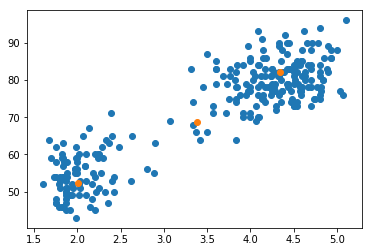

In [369]:
plt.scatter(data[0,:],data[1,:])
plt.scatter(cmeans.new_centers[0,:],cmeans.new_centers[1,:])

In [371]:
cmeans.fit()

1-th iteration
U difference is 67.45050391187804
2-th iteration
U difference is 92.76200761016047
3-th iteration
U difference is 135.41105205990397
4-th iteration
U difference is 90.35883645043474
5-th iteration
U difference is 41.218281051185976
6-th iteration
U difference is 16.867982550681287
7-th iteration
U difference is 9.77209973305841
8-th iteration
U difference is 8.76604531572415
9-th iteration
U difference is 9.16764920023755
10-th iteration
U difference is 9.81810396964865
11-th iteration
U difference is 10.53487558136829
12-th iteration
U difference is 11.209159631324537
13-th iteration
U difference is 11.712614654807386
14-th iteration
U difference is 11.99154175947169
15-th iteration
U difference is 11.910612547930036
16-th iteration
U difference is 11.366663214800084
17-th iteration
U difference is 10.363419470663814
18-th iteration
U difference is 9.036612978570556
19-th iteration
U difference is 7.642623411661811
20-th iteration
U difference is 6.226108233192704
21-th

In [321]:
cmeans.new_centers

array([[ 3.48897608,  3.50164567,  3.47239002],
       [70.90954251, 71.07518028, 70.70200163]])

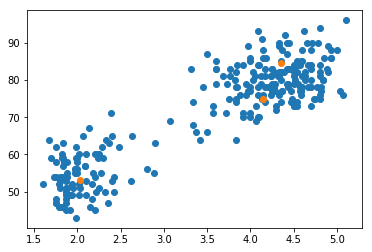

In [375]:
plt.scatter(data[0,:],data[1,:])
plt.scatter(cmeans.new_centers[0,:],cmeans.new_centers[1,:])
# plt.scatter(cm_result[0][:,0],cm_result[0][:,1])

In [ ]:
plt.scatter(cm_result[0][:,0],cm_result[0][:,1])

In [309]:
cmeans.U

array([[0.35983919, 0.31187939, 0.35675266, 0.33832776, 0.36319726,
        0.32115613, 0.36372049, 0.361318  , 0.29829713, 0.36282689,
        0.3120351 , 0.36180183, 0.36097277, 0.27208507, 0.36330721,
        0.3045294 , 0.33621602, 0.363643  , 0.30177783, 0.36141691,
        0.29756658, 0.27208507, 0.35909576, 0.35183209, 0.36018978,
        0.36094779, 0.31669704, 0.35988454, 0.36009351, 0.36186435,
        0.35895219, 0.36130617, 0.34931502, 0.36118489, 0.35817316,
        0.30378684, 0.27968674, 0.36308103, 0.32921995, 0.36390212,
        0.36193331, 0.32655428, 0.3631551 , 0.32597437, 0.35965069,
        0.36034688, 0.34822141, 0.30894396, 0.36300577, 0.32993471,
        0.36142212, 0.36378504, 0.3120351 , 0.36308103, 0.31156456,
        0.36370322, 0.35577346, 0.33986886, 0.36156825, 0.36209506,
        0.33094407, 0.36301507, 0.27913625, 0.36337847, 0.33180378,
        0.36324339, 0.36088963, 0.36223862, 0.34305779, 0.36015368,
        0.36167409, 0.32039771, 0.36202852, 0.35

In [280]:
cmeans.new_centers

array([[ 3.47392789,  3.49727801,  3.49114837],
       [70.7306926 , 71.02505138, 70.92499928]])

In [269]:
cmeans.means()

In [270]:
cmeans.members()

In [271]:
cmeans.estimate()

In [272]:
cmeans.diff_U

0.0

In [263]:
cmeans.pre_U

array([[0.28477362, 0.24101824, 0.27911655, 0.25991648, 0.29067703,
        0.24396928, 0.29306101, 0.29019275, 0.23215009, 0.29058014,
        0.24102149, 0.28953002, 0.28409607, 0.21854101, 0.28910241,
        0.23523545, 0.25968277, 0.29000332, 0.23526237, 0.28514054,
        0.23217157, 0.21854101, 0.28366967, 0.2722847 , 0.27983906,
        0.28850999, 0.24375033, 0.28187846, 0.28389436, 0.28524666,
        0.27846679, 0.28320161, 0.26775392, 0.28599711, 0.27940922,
        0.2352381 , 0.22209797, 0.28645658, 0.25344925, 0.29451134,
        0.28617647, 0.25118977, 0.28987623, 0.25114901, 0.27861426,
        0.28836354, 0.26454828, 0.23820829, 0.28818859, 0.25350808,
        0.28118481, 0.29447833, 0.24102149, 0.28645658, 0.24101208,
        0.28920455, 0.27549923, 0.26340099, 0.28326206, 0.28710147,
        0.25359493, 0.28983998, 0.22215904, 0.28828299, 0.2556225 ,
        0.29565178, 0.28407684, 0.28439251, 0.26535248, 0.27872166,
        0.28785676, 0.24634846, 0.28528583, 0.27

In [231]:
cmeans.estimate()
cmeans.diff_U

0.0

In [205]:
pre = cmeans.pre_U

In [208]:
pre

array([[5.12003721e-01, 1.15627425e-01, 7.15832088e-01, 4.29356443e-02,
        2.77374729e-01, 1.37750274e-02, 1.87758091e-01, 5.60030765e-01,
        1.09143052e-01, 2.83246603e-01, 7.10905626e-03, 3.10590146e-01,
        3.58709687e-01, 2.55799572e-01, 8.33801029e-02, 8.72887047e-01,
        8.62026309e-01, 1.06982002e-01, 1.16493402e-01, 8.47974957e-02,
        1.82811939e-01, 5.58978008e-01, 3.30021072e-01, 2.42050037e-01,
        2.42047103e-02, 2.34897885e-02, 3.47060674e-01, 1.20535049e-02,
        3.16357628e-01, 5.21987464e-01, 3.98749592e-01, 1.22971707e-03,
        4.55669059e-01, 4.13731199e-01, 4.88620317e-01, 6.14523384e-02,
        6.40217282e-02, 3.61082739e-01, 2.94643767e-01, 8.85886706e-01,
        1.35899317e-02, 4.42252603e-02, 8.72943879e-01, 6.00168877e-01,
        9.59112872e-02, 3.50826951e-01, 1.44835268e-01, 7.14878125e-01,
        7.16275273e-01, 7.73198907e-02, 1.44094945e-01, 5.45944888e-01,
        3.67595199e-01, 1.94793011e-01, 4.09833146e-01, 4.783593

In [207]:
cmeans.members()

In [209]:
new = cmeans.U

In [210]:
tmp = pre - new

In [215]:
np.absolute(tmp).sum()

176.8757655988455

In [311]:
from skfuzzy.cluster import cmeans

In [312]:
cm_result = cmeans(data,3,2,0.003,10000)

In [316]:
cm_result[0]

array([[ 2.02706562, 53.19093331],
       [ 4.35683333, 84.4304728 ],
       [ 4.13951147, 74.79484806]])